# **Week 7 Project: Model Selection & Evaluation**

In [12]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report,precision_recall_curve,confusion_matrix #for plotting curves
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = load_breast_cancer()
x, y = data.data, data.target
print("Feature shape:", x.shape)
print("Target classes:", np.unique(y))

Feature shape: (569, 30)
Target classes: [0 1]


In [15]:
# for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [16]:
# for validation
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.125,random_state=42, stratify=y_train)

In [17]:
print("Train size:", x_train.shape)
print("Validation size:", x_val.shape)
print("Test size:", x_test.shape)

Train size: (398, 30)
Validation size: (57, 30)
Test size: (114, 30)


In [18]:
# loading Logistic Regression
model=LogisticRegression(max_iter=10000)

In [19]:
# model training
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [20]:
y_test_pred=model.predict(x_test)
y_val_pred=model.predict(x_val)

**Validation Classification**

In [21]:
print("Validation Classification Report:\n",classification_report(y_val,y_val_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.92      0.94      0.93        36

    accuracy                           0.91        57
   macro avg       0.91      0.90      0.90        57
weighted avg       0.91      0.91      0.91        57



In [26]:
# predict probabilities, take all rows but only the last column
y_val_prob=model.predict_proba(x_val)[:, -1]

In [27]:
# _ represents the threshold here
fpr,tpr,_=roc_curve(y_val,y_val_prob)

In [28]:
roc_auc=auc(fpr,tpr)

**ROC Curve Plotting**

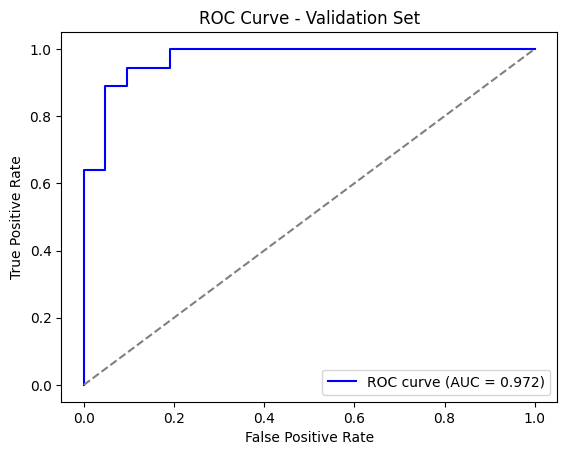

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

In [33]:
precision,recall,_= precision_recall_curve(y_val,y_val_prob)

**Precision-Recall Curve Plotting**

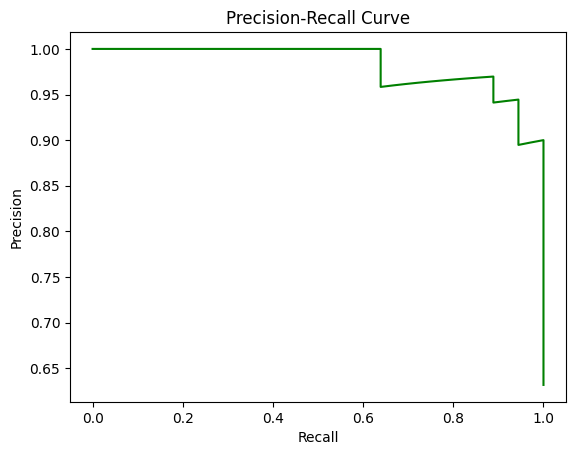

In [34]:
plt.figure()
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**CV Scores**

In [39]:
cv_roc_scores=cross_val_score(model,x,y,cv=5,scoring='roc_auc')
print("AUC score for each split:",cv_roc_scores)
print("Average AUC:",cv_roc_scores.mean())

AUC score for each split: [0.99377661 0.99344907 0.99801587 0.97949735 0.99765258]
Average AUC: 0.9924782978664407


**Actual AUC Score**

In [45]:
y_test_prob=model.predict_proba(x_test)[:,-1]
test_fpr,test_tpr,_=roc_curve(y_test,y_test_prob)
test_auc=auc(test_fpr,test_tpr)
print("Final Test AUC:",test_auc)

Final Test AUC: 0.9947089947089947
